In [1]:
import torch
import numpy as np
from torch.autograd import Variable
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
xy = np.loadtxt('data/diabetes.csv', delimiter=',', dtype=np.float32)

x_data = Variable(torch.from_numpy(xy[:, 0:-1]))
y_data = Variable(torch.from_numpy(xy[:, [-1]]))

In [3]:
xy.shape

(759, 9)

In [4]:
xy[:9, :]

array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ,  0.        ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  ,  0.        ,
        -0.207153  , -0.766866  , -0.666667  ,  1.        ],
       [-0.0588235 ,  0.839196  ,  0.0491803 ,  0.        ,  0.        ,
        -0.305514  , -0.492741  , -0.633333  ,  0.        ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  ,  0.        ,  1.        ],
       [ 0.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ,  0.        ],
       [-0.411765  ,  0.165829  ,  0.213115  ,  0.        ,  0.        ,
        -0.23696   , -0.894962  , -0.7       ,  1.        ],
       [-0.647059  , -0.21608   , -0.180328  , -0.353535  , -0.791962  ,
        -0.0760059 , -0.854825  , -0.833333  ,  0.        ],
       [ 0.176471  ,  0.155779  ,  0.        ,  0.        ,  0

In [5]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8,6)
        self.l2 = torch.nn.Linear(6,4)
        self.l3 = torch.nn.Linear(4,1)

        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self,x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        
        return y_pred

In [6]:
model = Model()

criterion = torch.nn.BCELoss(reduction='elementwise_mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [7]:
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 tensor(0.6823)
1 tensor(0.6787)
2 tensor(0.6754)
3 tensor(0.6725)
4 tensor(0.6699)
5 tensor(0.6675)
6 tensor(0.6653)
7 tensor(0.6634)
8 tensor(0.6616)
9 tensor(0.6600)
10 tensor(0.6586)
11 tensor(0.6573)
12 tensor(0.6561)
13 tensor(0.6551)
14 tensor(0.6541)
15 tensor(0.6532)
16 tensor(0.6524)
17 tensor(0.6517)
18 tensor(0.6511)
19 tensor(0.6505)
20 tensor(0.6499)
21 tensor(0.6494)
22 tensor(0.6490)
23 tensor(0.6486)
24 tensor(0.6482)
25 tensor(0.6479)
26 tensor(0.6476)
27 tensor(0.6473)
28 tensor(0.6471)
29 tensor(0.6469)
30 tensor(0.6467)
31 tensor(0.6465)
32 tensor(0.6463)
33 tensor(0.6462)
34 tensor(0.6460)
35 tensor(0.6459)
36 tensor(0.6458)
37 tensor(0.6457)
38 tensor(0.6456)
39 tensor(0.6455)
40 tensor(0.6454)
41 tensor(0.6453)
42 tensor(0.6453)
43 tensor(0.6452)
44 tensor(0.6451)
45 tensor(0.6451)
46 tensor(0.6450)
47 tensor(0.6450)
48 tensor(0.6450)
49 tensor(0.6449)
50 tensor(0.6449)
51 tensor(0.6449)
52 tensor(0.6448)
53 tensor(0.6448)
54 tensor(0.6448)
55 tensor(0.6448)
56

In [8]:
model(x_data[:10, :])

tensor([[0.6518],
        [0.6546],
        [0.6521],
        [0.6521],
        [0.6493],
        [0.6536],
        [0.6528],
        [0.6531],
        [0.6528],
        [0.6516]], grad_fn=<SigmoidBackward>)

In [9]:
y_data[:10]

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.]])

In [10]:
Counter(xy[:, -1])

Counter({0.0: 263, 1.0: 496})

(array([  1.,   4.,  14.,  45.,  97., 195., 184., 127.,  72.,  20.]),
 array([0.64719725, 0.64801378, 0.64883032, 0.64964685, 0.65046339,
        0.65127993, 0.65209646, 0.652913  , 0.65372953, 0.65454607,
        0.65536261]),
 <a list of 10 Patch objects>)

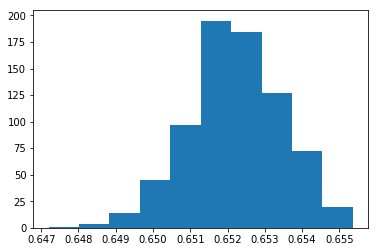

In [11]:
plt.hist(model(x_data).detach().numpy())

Hmm, it seems like this model isn't very good!

Maybe that is because it's not a very good network!

Maybe that is because this data isn't well suited to a neural network!